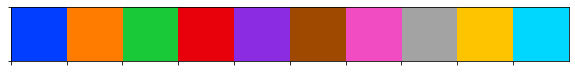

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
# sns.set_palette(palette1)
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/CSSEGISandData/COVID-19/
# transpose matrices for better data handling
! curl https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv > ../external_data/dpc-covid19-ita-regioni.csv

# confirmed COVID-19 positive cases for Italy
data = pd.read_csv("../external_data/dpc-covid19-ita-regioni.csv")
data.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 64 49122   64 31861    0     0  31861      0  0:00:01 --:--:--  0:00:01 65828
100 49122  100 49122    0     0  49122      0  0:00:01 --:--:--  0:00:01   99k


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10
5,2020-02-24 18:00:00,ITA,8,Emilia Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,148
6,2020-02-24 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,58
7,2020-02-24 18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,2,1,0,3,124
8,2020-02-24 18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,1
9,2020-02-24 18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,1463


In [3]:
# region_names = data["denominazione_regione"].unique()
dates = data["data"].unique()
conf = pd.DataFrame(columns = ["data"])
conf["data"] = dates
deaths = pd.DataFrame(columns = ["data"])
deaths["data"] = dates
tests = pd.DataFrame(columns = ["data"])
tests["data"] = dates

In [4]:
for name, group in data.groupby('denominazione_regione'):
    conf = conf.merge(group[["totale_casi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    conf.rename(columns={"totale_casi": name}, inplace=True)
    deaths = deaths.merge(group[["deceduti","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    deaths.rename(columns={"deceduti": name}, inplace=True)
    tests = tests.merge(group[["tamponi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    tests.rename(columns={"tamponi": name}, inplace=True)
    
conf.set_index('data', inplace=True)
deaths.set_index('data', inplace=True)
tests.set_index('data', inplace=True)
conf.tail()

,Abruzzo,Basilicata,Calabria,Campania,Emilia Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Bolzano,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
data,,,,,,,,,,,,,,,,,,,,,
2020-03-16 17:00:00,176,12,89,400,3522,386,523,667,14649,1242,...,241,378,1516,230,107,213,866,164,105,2473
2020-03-17 17:00:00,229,20,114,460,3931,394,607,778,16220,1371,...,291,385,1897,340,117,237,1053,197,136,2704
2020-03-18 17:00:00,263,27,129,460,4525,462,724,887,17713,1568,...,376,455,2341,383,134,282,1330,247,165,3214
2020-03-19 17:00:00,385,37,169,652,5214,599,823,1059,19884,1737,...,436,523,2932,478,206,340,1482,334,215,3484
2020-03-20 17:00:00,449,52,207,749,5968,656,1008,1221,22264,1981,...,548,642,3461,581,293,408,1793,395,264,4031


In [5]:
# select only countries with > 200 positive COVID-19 cases
contries_ordered = conf.max().sort_values(ascending=False)
print(contries_ordered[:10])

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

Lombardia                22264
Emilia Romagna            5968
Veneto                    4031
Piemonte                  3461
Marche                    1981
Toscana                   1793
Liguria                   1221
Lazio                     1008
Campania                   749
Friuli Venezia Giulia      656
dtype: int64


In [6]:
# latest number of cases by country
print(conf.max())

Abruzzo                    449
Basilicata                  52
Calabria                   207
Campania                   749
Emilia Romagna            5968
Friuli Venezia Giulia      656
Lazio                     1008
Liguria                   1221
Lombardia                22264
Marche                    1981
Molise                      50
P.A. Bolzano               548
P.A. Trento                642
Piemonte                  3461
Puglia                     581
Sardegna                   293
Sicilia                    408
Toscana                   1793
Umbria                     395
Valle d'Aosta              264
Veneto                    4031
dtype: int64


In [7]:
# remove Cruise Ship
# conf.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)

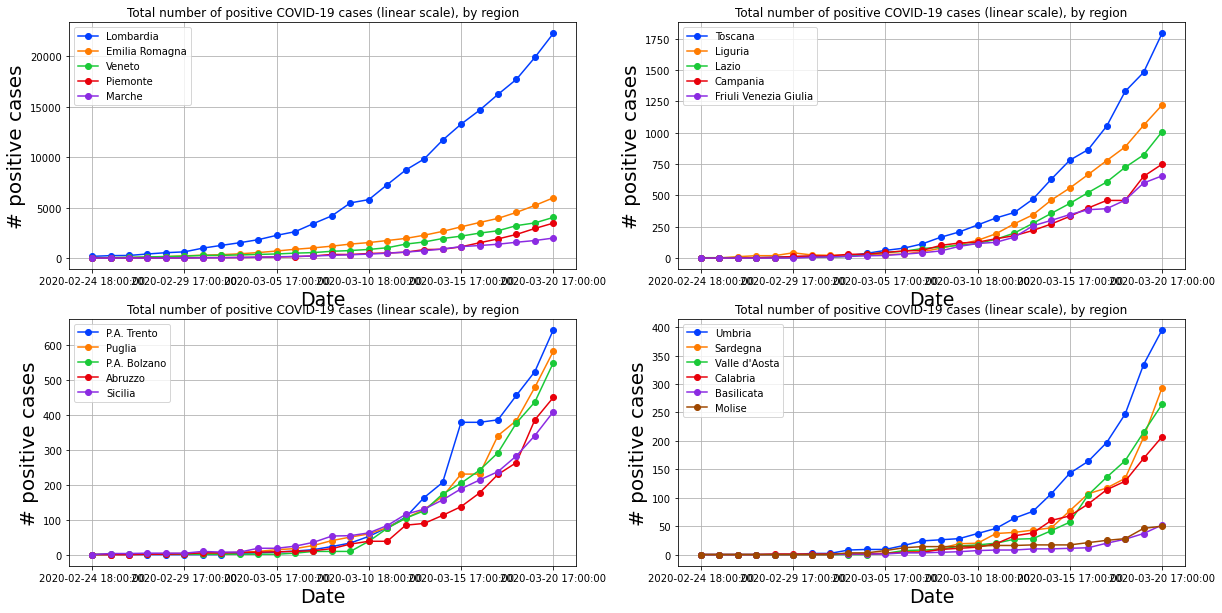

In [8]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# positive cases", fontsize=20)
        count+=1

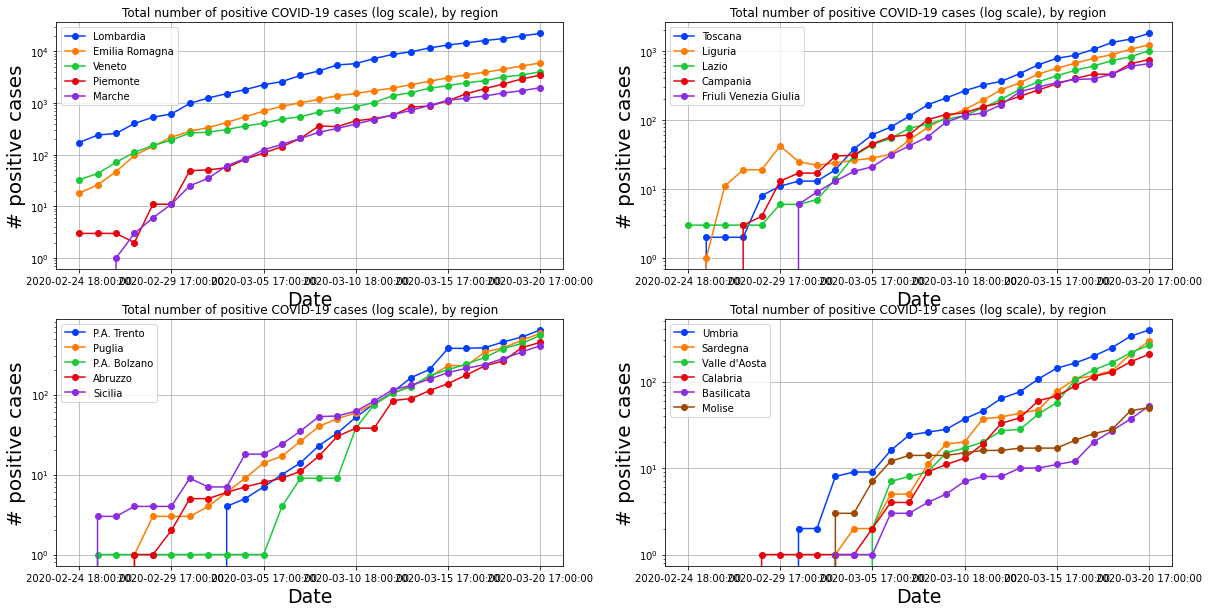

In [9]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(logy=True, grid=True, marker='o', ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# positive cases", fontsize=20)
        count+=1

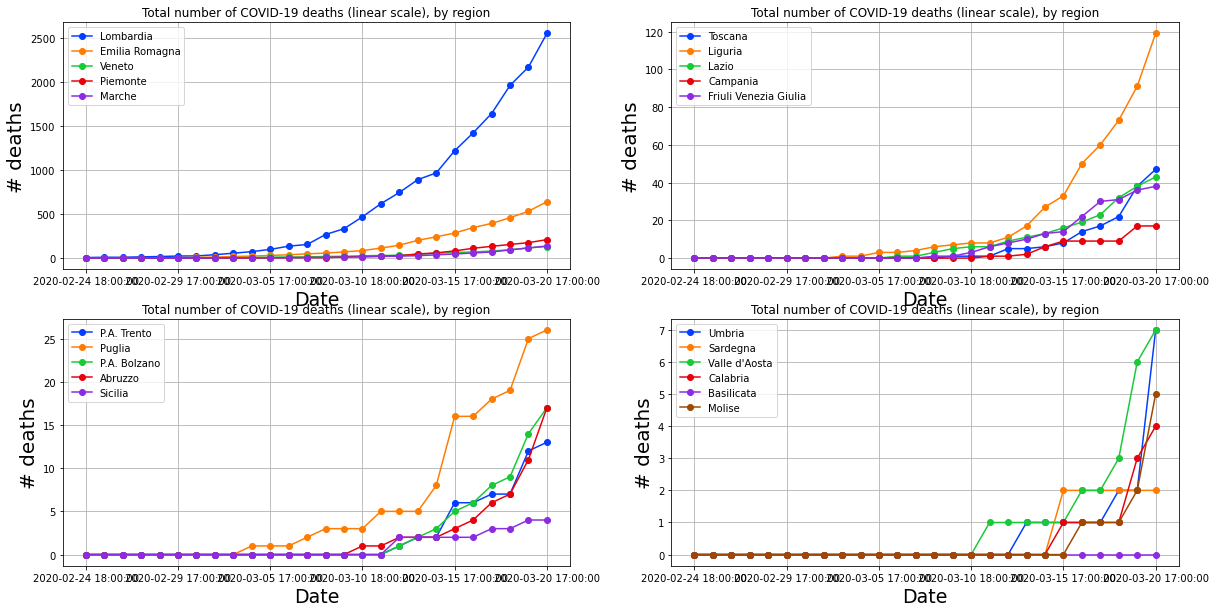

In [10]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Total number of COVID-19 deaths (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# deaths", fontsize=20)
        count+=1

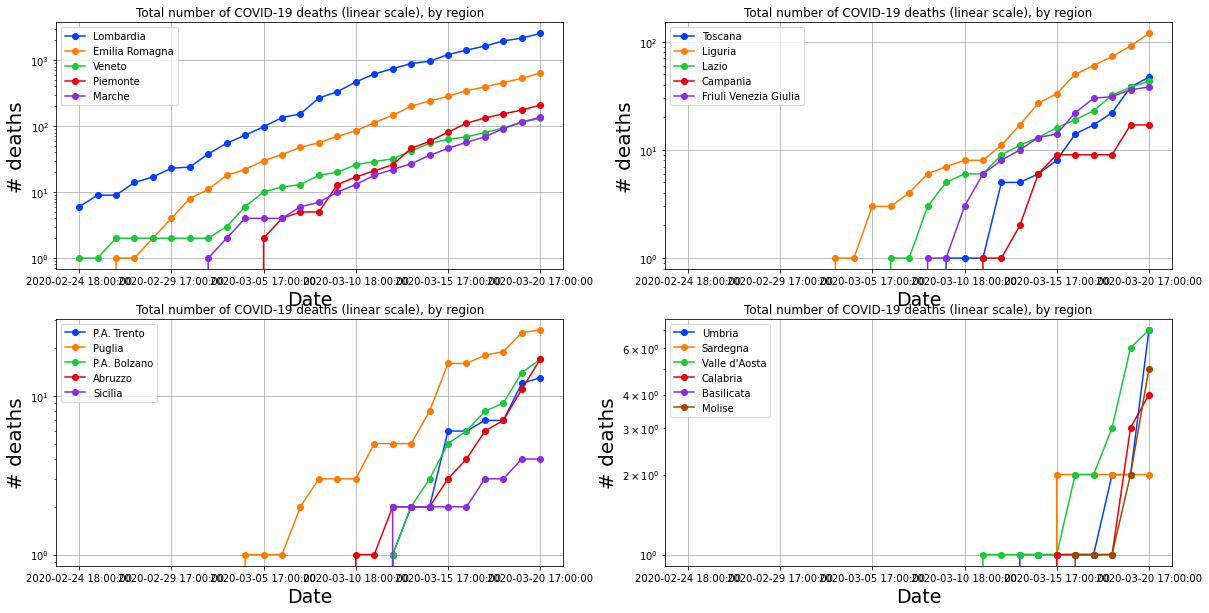

In [11]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(logy=True, grid=True, marker='o', ax=axes[r,c],
                 title='Total number of COVID-19 deaths (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# deaths", fontsize=20)
        count+=1

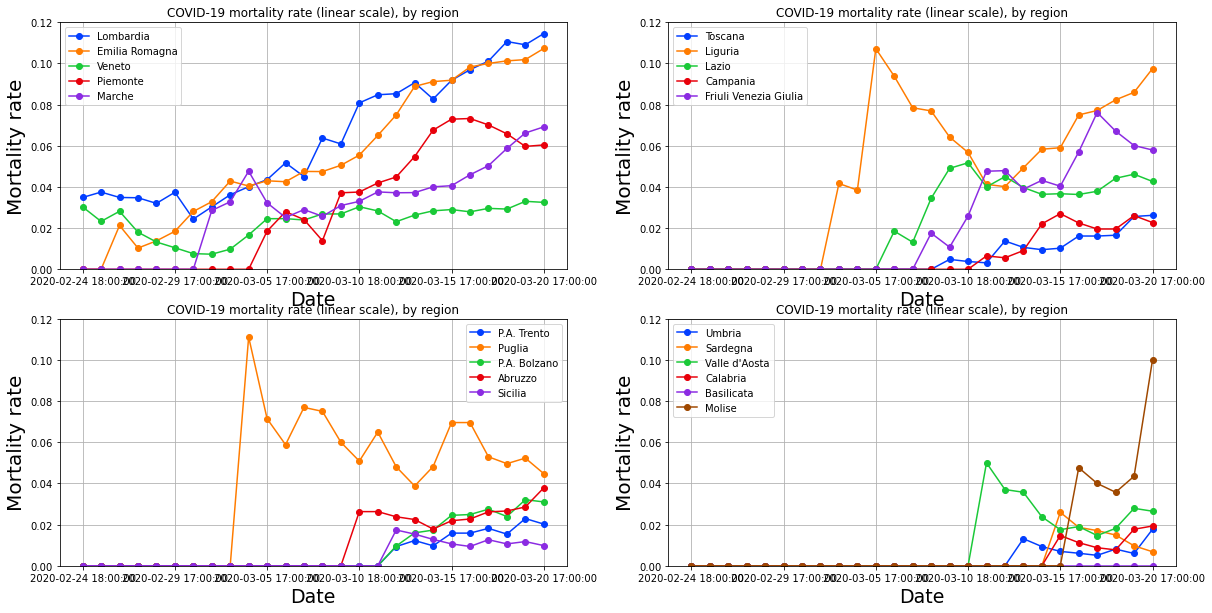

In [12]:
mortality = deaths.divide(conf.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        mortality[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='COVID-19 mortality rate (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Mortality rate", fontsize=20)
        axes[r,c].set_ylim(0,0.12)
        count+=1

In [13]:
# retrieve population information
# source http://dati-censimentopopolazione.istat.it/Index.aspx?lang=en
population = pd.read_csv("../external_data/DICA_POP_RESPRE_Data_9d65c5fb-6eaa-413c-a013-61a8ad3bce06.csv", encoding = "ISO-8859-1")

In [14]:
# rename population country names that don't match COVID-19 data
population = population.replace('Emilia-Romagna', 'Emilia Romagna')
population = population.replace('Friuli-Venezia Giulia', 'Friuli Venezia Giulia')
population = population.replace("Valle d'Aosta / Vallée d'Aoste", "Valle d\'Aosta")
print(population["Territory"])

0       Bologna
1       Bologna
2       Bologna
3       Bologna
4       Bologna
         ...   
3397    Trieste
3398    Venezia
3399    Venezia
3400     Verona
3401     Verona
Name: Territory, Length: 3402, dtype: object


In [15]:
population = population[(population["Territory"].isin(set(list(conf.columns.values)))) & 
                       (population["Data type"] == "present population (absolute values)") &
                       (population["Gender"] == "total") &
                       (population["Age"] == "total") ]
population = population[["Territory","0"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population = population.loc[:,~population.columns.duplicated()]

In [16]:
# create copy
conf_no_norm = conf.copy()

# concatenate dataset
conf_population_norm = pd.concat([population,conf])
conf_population_norm.head()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Umbria,Marche,...,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna,P.A. Bolzano,P.A. Trento
0,4.39384e+06,128664,1.60573e+06,9.80737e+06,4.95495e+06,1.23702e+06,4.44907e+06,3.76008e+06,917784,1.59126e+06,...,1.31404e+06,308967,5.84041e+06,4.09045e+06,573458,1.93658e+06,5.1511e+06,1.64133e+06,NaN,NaN
2020-02-24 18:00:00,3,0,0,172,33,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2020-02-25 18:00:00,3,0,1,240,43,0,26,2,0,0,...,0,0,0,0,0,0,3,0,1.0,0.0
2020-02-26 18:00:00,3,0,11,258,71,0,47,2,0,1,...,0,0,0,0,0,0,3,0,1.0,0.0
2020-02-27 18:00:00,2,0,19,403,111,0,97,2,0,3,...,1,0,3,1,0,0,4,0,1.0,0.0


In [17]:
# divide cases rows by population/10/1e3 row to obtain number of cases per 1e4 persons
conf_population_norm = conf_population_norm.loc[:].div(conf_population_norm.iloc[0][:]/10/1e3)

In [18]:
# remove population row
conf_population_norm = conf_population_norm.iloc[1:]
conf_population_norm.dropna(axis=1, inplace=True)
conf_population_norm.tail()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Umbria,Marche,Lazio,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna
2020-03-16 17:00:00,3.45029,8.16079,4.15388,14.9367,4.99097,3.12039,7.91627,2.30314,1.78691,7.80511,0.920858,1.33938,0.679684,0.684884,0.562285,0.209257,0.459574,0.413504,0.65191
2020-03-17 17:00:00,4.31741,10.5702,4.84515,16.5386,5.45717,3.18506,8.83556,2.80047,2.14647,8.61579,1.06876,1.74271,0.809148,0.787616,0.831204,0.348761,0.588668,0.460096,0.712836
2020-03-18 17:00:00,5.32792,12.8241,5.52397,18.0609,6.48644,3.73477,10.1707,3.53716,2.69127,9.8538,1.27476,2.00145,0.906246,0.787616,0.936327,0.470828,0.666124,0.547456,0.816411
2020-03-19 17:00:00,6.67298,16.7102,6.59514,20.2745,7.03135,4.84226,11.7193,3.94141,3.6392,10.9158,1.44908,2.92988,1.48883,1.11636,1.16858,0.645209,0.872674,0.660054,1.25508
2020-03-20 17:00:00,7.87694,20.5186,7.60403,22.7013,8.1353,5.30305,13.414,4.76852,4.30384,12.4492,1.77481,3.41693,1.6183,1.28244,1.42038,0.90678,1.0689,0.792064,1.78514


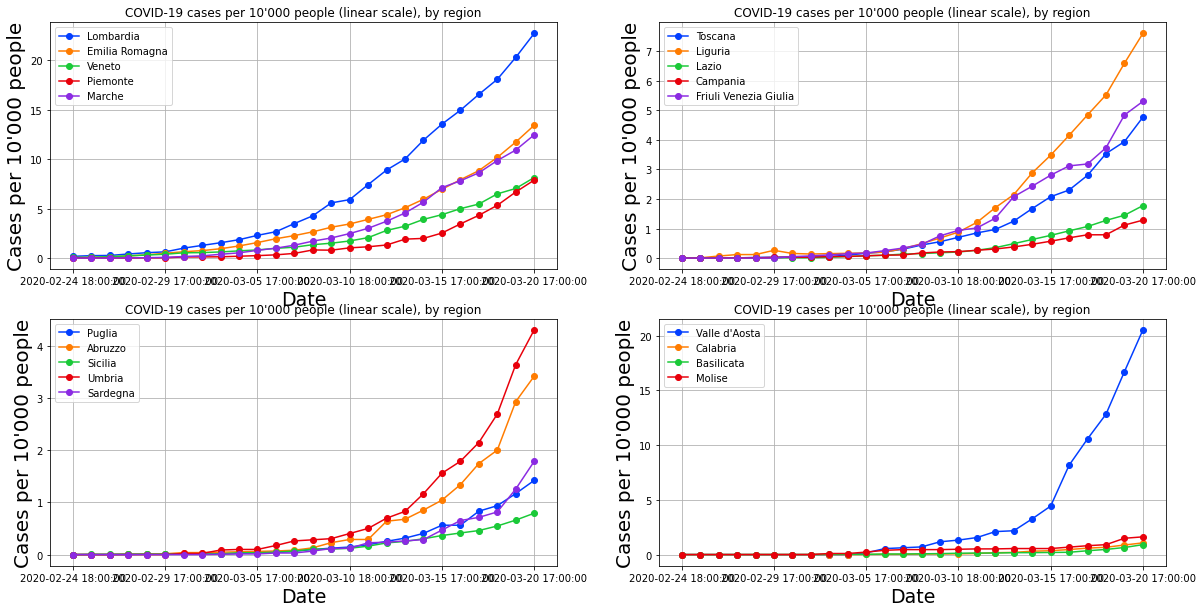

In [19]:
contries_ordered2 = [country for country in contries_ordered.index.to_list() if not "P.A." in country]

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_population_norm[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (linear scale), by region", figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=20)
        count+=1

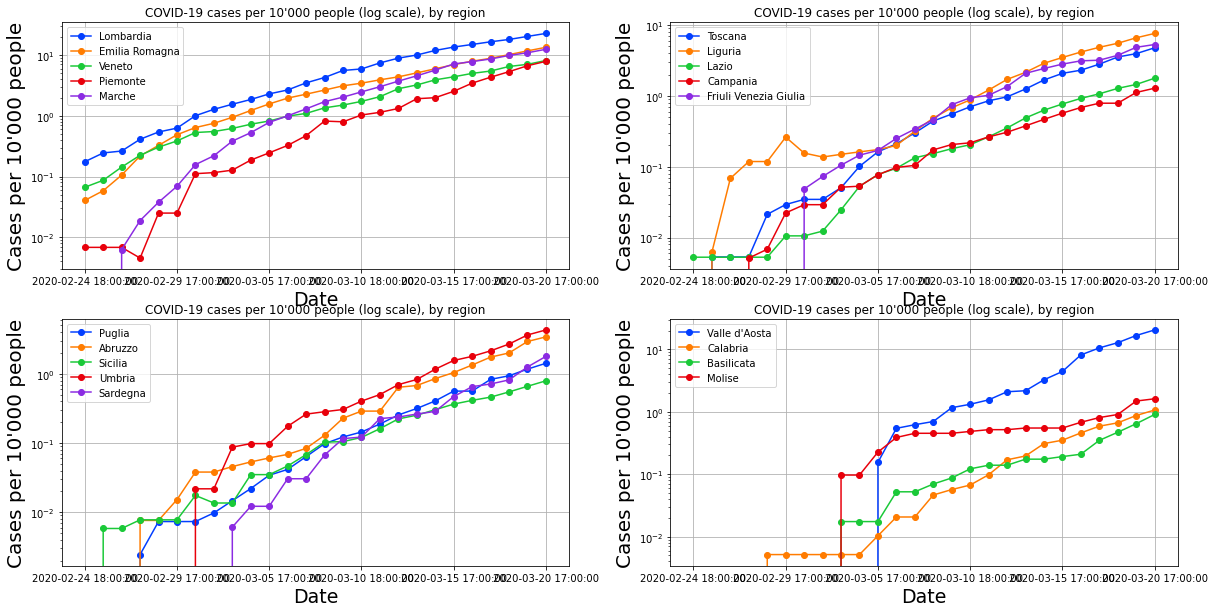

In [20]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_population_norm[plot_countries].plot(logy=True, grid=True, marker='o', ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (log scale), by region", figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=20)
        count+=1

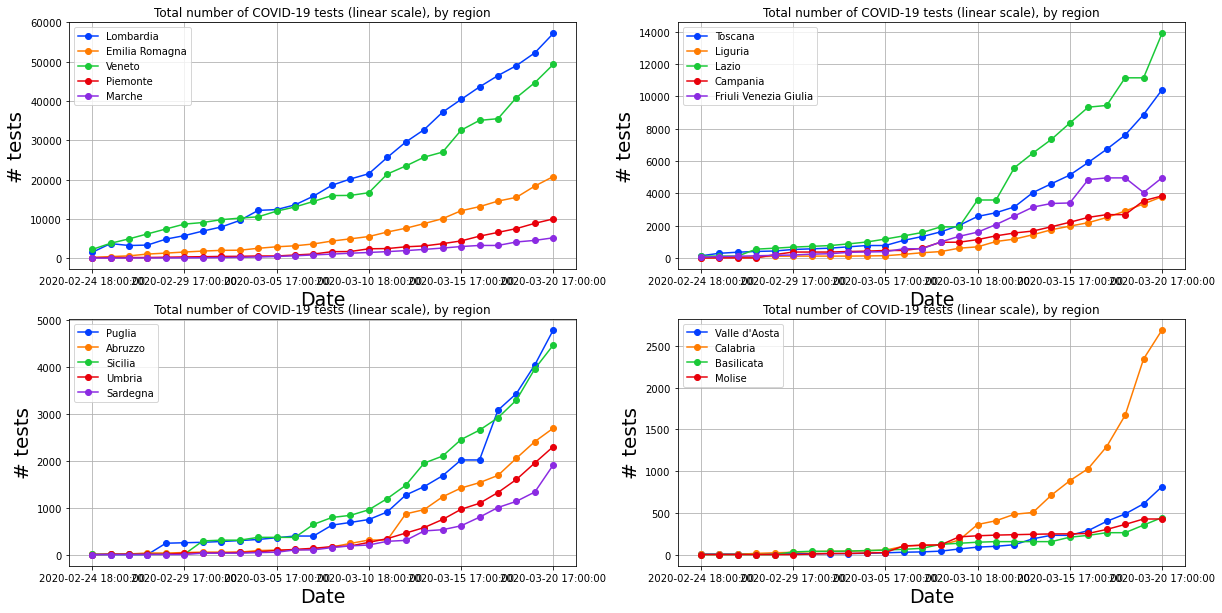

In [21]:
contries_ordered2 = [country for country in contries_ordered.index.to_list() if not "P.A." in country]

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        tests[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Total number of COVID-19 tests (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# tests", fontsize=20)
        count+=1

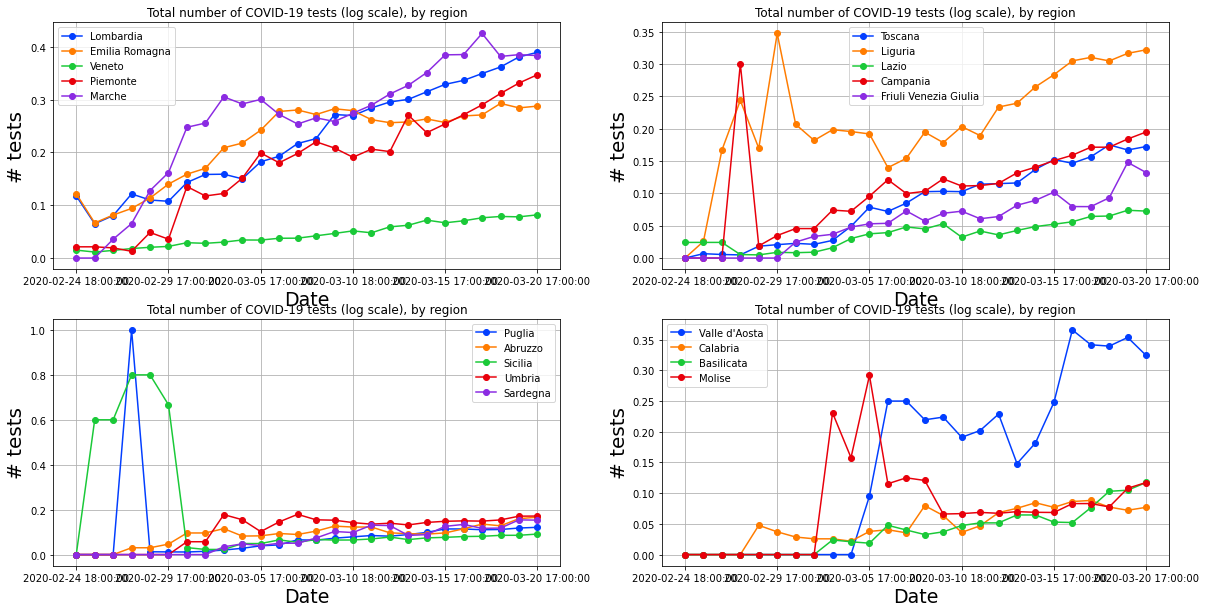

In [22]:
conf_per_test = conf_no_norm.divide(tests.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_per_test[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Total number of COVID-19 tests (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# tests", fontsize=20)
        count+=1

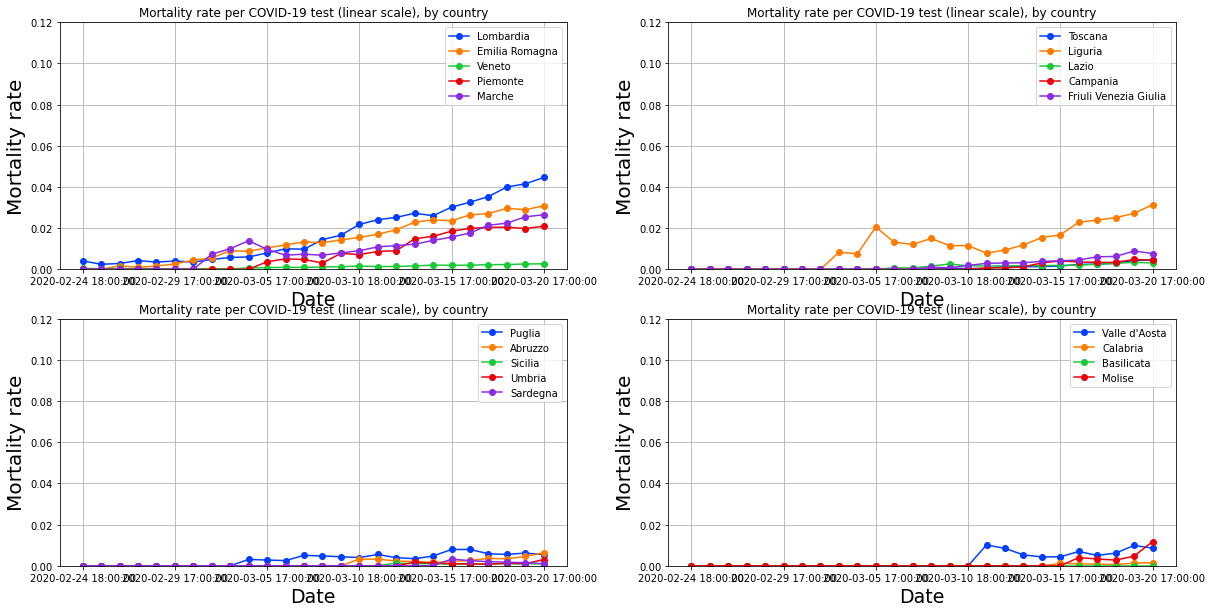

In [23]:
mortality_per_test = deaths.divide(tests.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        mortality_per_test[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Mortality rate per COVID-19 test (linear scale), by country', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Mortality rate", fontsize=20)
        axes[r,c].set_ylim(0,0.12)
        count+=1

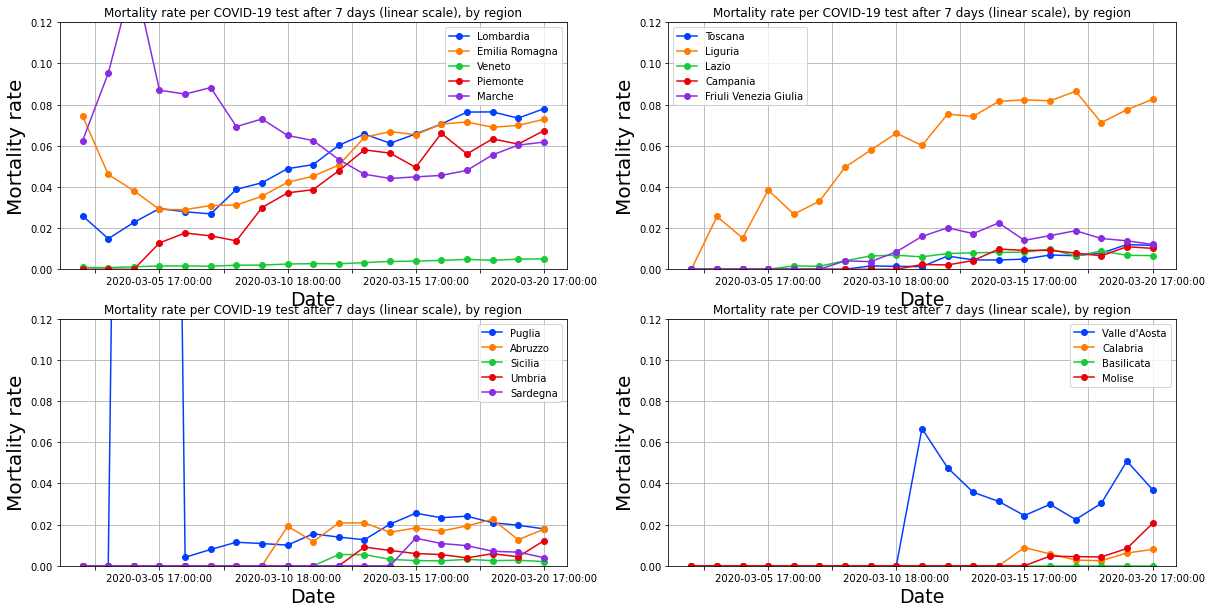

In [24]:
tests_7d_ago = tests[tests.columns.values].shift(7)
tests_7d_ago = tests_7d_ago.dropna()

mortality_after_7d_per_test = deaths.divide(tests_7d_ago.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        mortality_after_7d_per_test[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Mortality rate per COVID-19 test after 7 days (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Mortality rate", fontsize=20)
        axes[r,c].set_ylim(0,0.12)

        count+=1

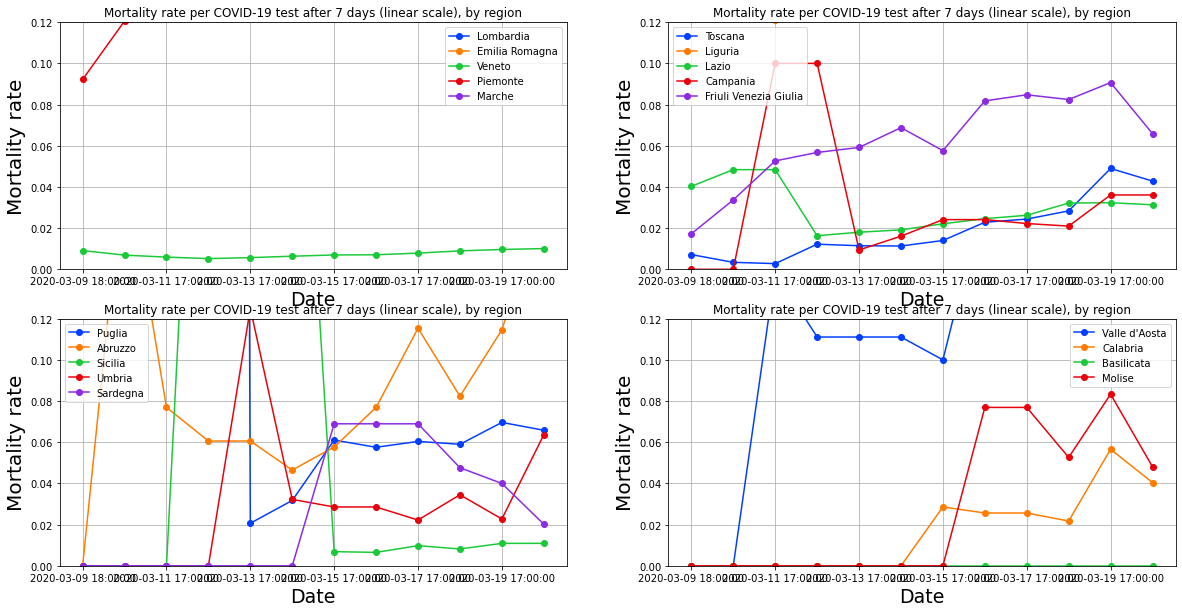

In [25]:
tests_14d_ago = tests[tests.columns.values].shift(14)
tests_14d_ago = tests_14d_ago.dropna()

mortality_after_14d_per_test = deaths.divide(tests_14d_ago.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        mortality_after_14d_per_test[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Mortality rate per COVID-19 test after 7 days (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Mortality rate", fontsize=20)
        axes[r,c].set_ylim(0,0.12)
        count+=1